# Analyzing CIA Factbook Data Using SQLite and Python
This project works mostly with SQL and there is less interface with Pandas and Matplotlib

In [1]:
# Initial Import
import pandas as pd
import sqlite3

In [2]:
# Connect to db and return information on tables in database
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()
query1 = "SELECT * FROM sqlite_master WHERE type='table'"
cursor.execute(query1).fetchall()
pd.read_sql_query(query1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
# Query first 5 rows of facts table
Facts_query = "select * from facts limit 5;"
# Ignore
# conn.execute(Facts_query).fetchmany(5)

# Execute query so that output is in table format
pd.read_sql_query(Facts_query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
# Single query to return minimum and maximum population and 
# minimum and maximum population growth
Pop_summary_query = "Select min(population), max(population), \
                     min(population_growth), max(population_growth)\
                     from facts"
pd.read_sql_query(Pop_summary_query, conn)


,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
# Write a query that returns the countrie(s) with population of 0
Min_pop_query = "Select name from facts \
                 where population in (select min(population) from facts)"
pd.read_sql_query(Min_pop_query, conn)


,name
0,Antarctica


In [6]:
# Write a query that returns the countrie(s) with population of 0
Max_pop_query = "Select name from facts \
                 where population in (select max(population) from facts)"
pd.read_sql_query(Max_pop_query, conn)


,name
0,World


# Observations of minimum and maximum population
Based on above two queries, the minimum population country is Antarctica, and the maximum population is for World.
World is not really a country. Antarctica is listed as 0 population as there are no indigenous inhabitants.

In [7]:
# New query disregarding the above two outliers
# Write a query that returns all except two countries
# Columns needed are population, population_growth, biirth_rate, death_rate
No_outlier_query = '''Select population, population_growth, birth_rate,
                    death_rate from facts 
                    where name not in ('Antarctica','World')
                   '''
No_outlier_df = pd.read_sql_query(No_outlier_query, conn)
No_outlier_df

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


C:\Users\kruiz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


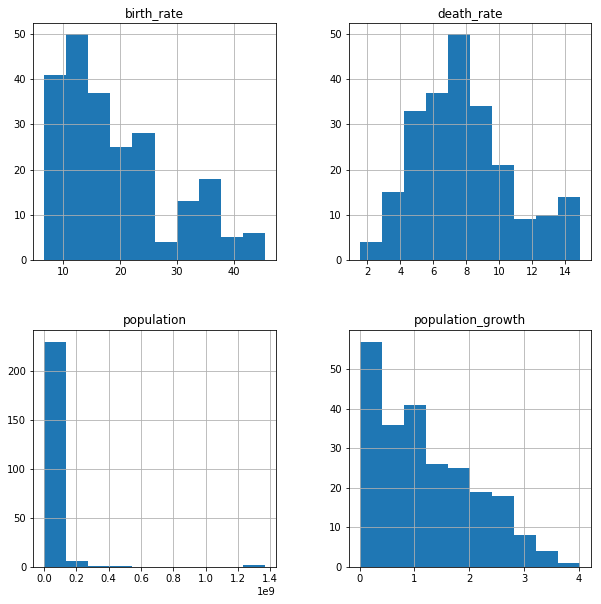

In [8]:
# Import to plot
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Plot the dataframe into a histogram
hist = No_outlier_df.hist(ax = ax)


# Which countries have the highest population density

1) From SQL, identify the countries with highest population density: Ratio of population to land area

2) Generate a histogram

3) Which countries have highest ratios of water to land?

4) Which countries have more water than land

In [9]:
# Query 1 - Identify countries with highest pop density (Pop / land area)
# Get results in dataframe
Pop_density_query = '''Select name, cast(population as float)/ 
                    cast(area_land as float) population_density
                    from facts where name not in ('Antarctica','World')
                    order by population_density desc limit 25
                   '''
Pop_density_df = pd.read_sql_query(Pop_density_query, conn)
Pop_density_df

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


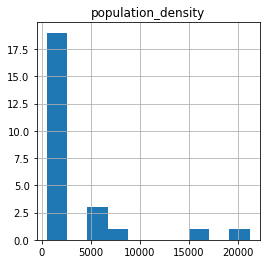

In [10]:
# Generate a histogram of population densities

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# Plot the dataframe into a histogram
hist = Pop_density_df.hist(ax = ax)


In [11]:
# Query 3 - Which countries have the highest ratios of water to land
Water_land_query = '''Select name, cast(area_water as float)/ cast(area_land as float) ratio_water_land
                    from facts where name not in ('Antarctica','World')
                    order by ratio_water_land desc limit 25
                   '''
Water_land_df = pd.read_sql_query(Water_land_query, conn)
Water_land_df

,name,ratio_water_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [12]:
# Query 4 - Which countries have more water than land
more_water_query = '''Select name, cast(area_water as float)/ cast(area_land as float) ratio_water_land
                    from facts where ratio_water_land > 1
                   '''
more_water_df = pd.read_sql_query(more_water_query, conn)
more_water_df

,name,ratio_water_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
